In [7]:
#This project is an analysis about UFO Signting, my first prpposal is about ocean influence rigional climate, but I can not find the some data that I need, so I changed it. 

#At the beginning, I set some questions to guide my analysis
    # Which country is the most popular place that UFO prefer to visit?
    # What is the most common shape of UFO?
    # What is the most common shape of UFO in different country?
    # What time is the "high appearing" period of UFO?

#Firstly import a banch of module that I need
import matlab 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
import codecs
from matlab import imread
from subprocess import check_output


In [19]:
#import the data and in this part I renamed the attribute name of different type of data to make the data more easy to understand
#and then preview some initial data

rawdata=pd.read_csv('ufo_sighting_data.csv')
rawdata.rename(columns={'Date_time':'Time','city':'City','state/province':'State/Province','country':'Country','UFO_shape':'Shape','length_of_encounter_seconds':'Encounter Seconds','described_duration_of_encounter':'Encounter Duration','description':'Description','date_documented':'Documented Date','latitude':'Latitude','longitude':'Longitude'},inplace=True)
rawdata=rawdata[['Time','City','State/Province','Country','Shape','Encounter Seconds','Encounter Duration','Description','Documented Date','Latitude','Longitude']]

rawdata.head()


,Time,City,State/Province,Country,Shape,Encounter Seconds,Encounter Duration,Description,Documented Date,Latitude,Longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [20]:
#At the begging I made some basic count 

rawdata.isnull().sum()

Time                     0
City                     0
State/Province        5797
Country               9670
Shape                 1932
Encounter Seconds        0
Encounter Duration       0
Description             15
Documented Date          0
Latitude                 0
Longitude                0
dtype: int64

In [21]:
print('Country with Highest UFO sighting:',rawdata['Country'].value_counts().index[0])
print('Year with Highest UFO sighting:',rawdata['Time'].value_counts().index[0])
print('The most common shape of UFO:',rawdata['Shape'].value_counts().index[0])

Country with Highest UFO sighting: us
Year with Highest UFO sighting: 7/4/2010 22:00
The most common shape of UFO: light


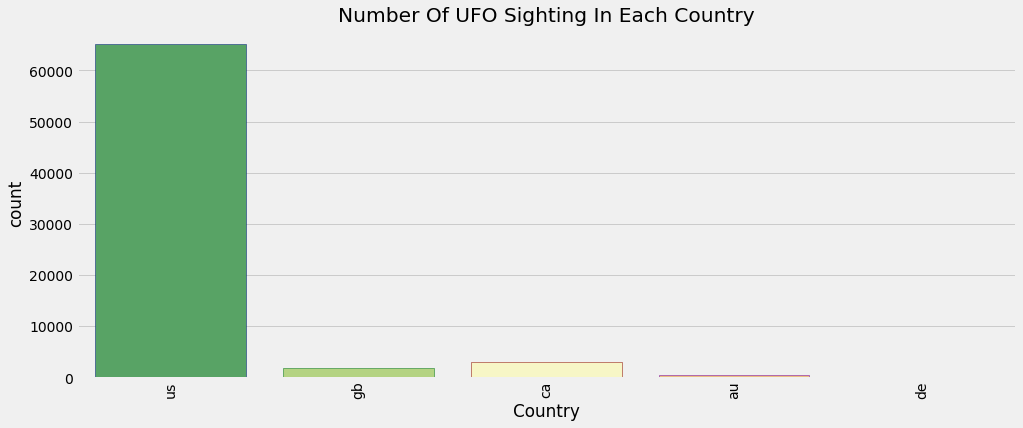

In [22]:
# This diagram shows the number of UFO sighting in different countries
# It is easy to see in the US, the number of UFO sighting is much more than other counties
# So, US is the most popular place that UFO prefer to visit

plt.subplots(figsize=(15,6))
sns.countplot('Country',data=rawdata,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of UFO Sighting In Each Country')
plt.show()


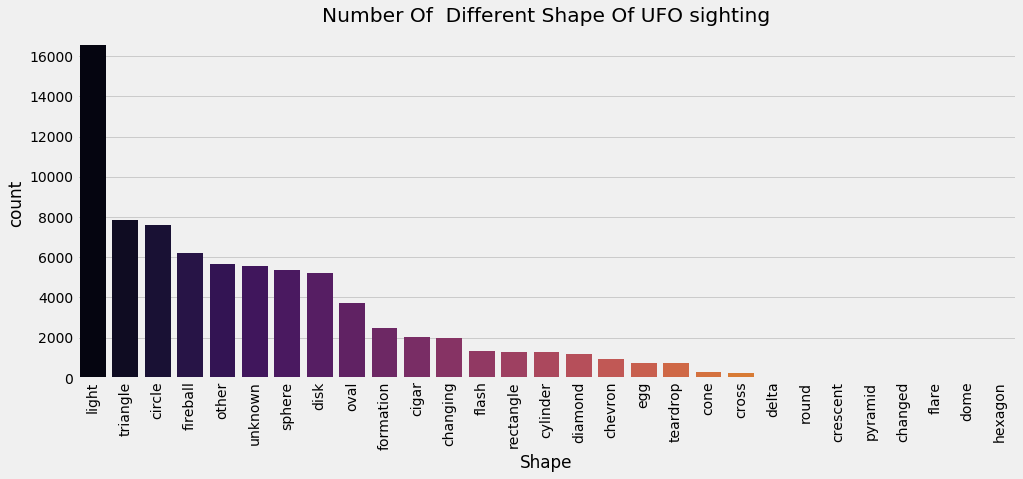

In [23]:
# This diagram shows the number of  different shape of UFO sighting, as we can see, the greatest number of UFO shape is "lignt"
# So the "light" is the most common shape of UFO
# In this diagram, the number of "light" UFO is more than twice the number of second largest UFO shape "triangle"
# so this data probably including some people looking in the wrong with some natural phenomena, because lignt is not a specific shape and it is nothing special in the nature  

plt.subplots(figsize=(15,6))
sns.countplot('Shape',data=rawdata,palette='inferno',order=rawdata['Shape'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of  Different Shape Of UFO sighting')
plt.show()

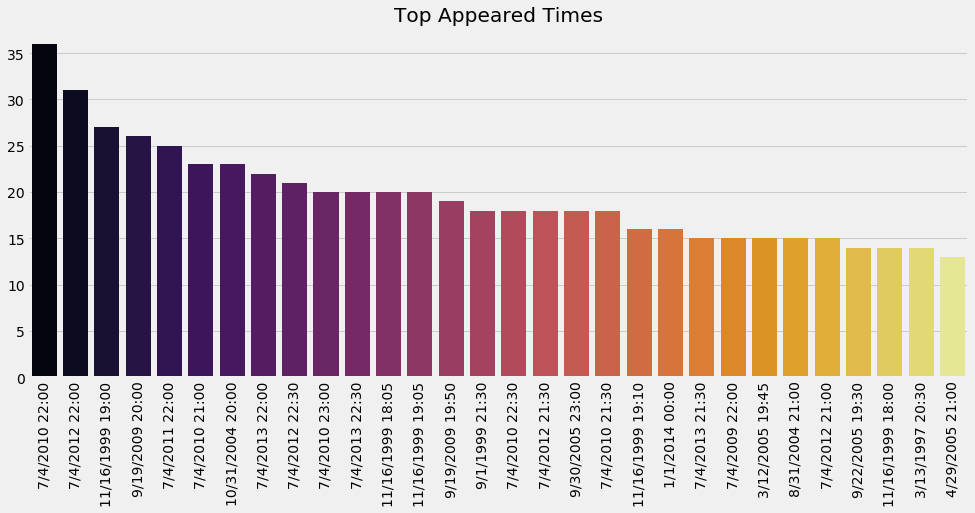

In [26]:
# This diagram shows the top appeared time of UFO, due to the data is date and time that including numerious data, so I just extract the top 30 times that UFO appeared, it can make people easy to read
# So the "high appearing" period of UFO was 7/4/2010 22:00
plt.subplots(figsize=(15,6))
sns.barplot(rawdata['Time'].value_counts()[:30].index,rawdata['Time'].value_counts()[:30].values,palette='inferno')
plt.xticks(rotation=90)
plt.title('Top Appeared Times')
plt.show()

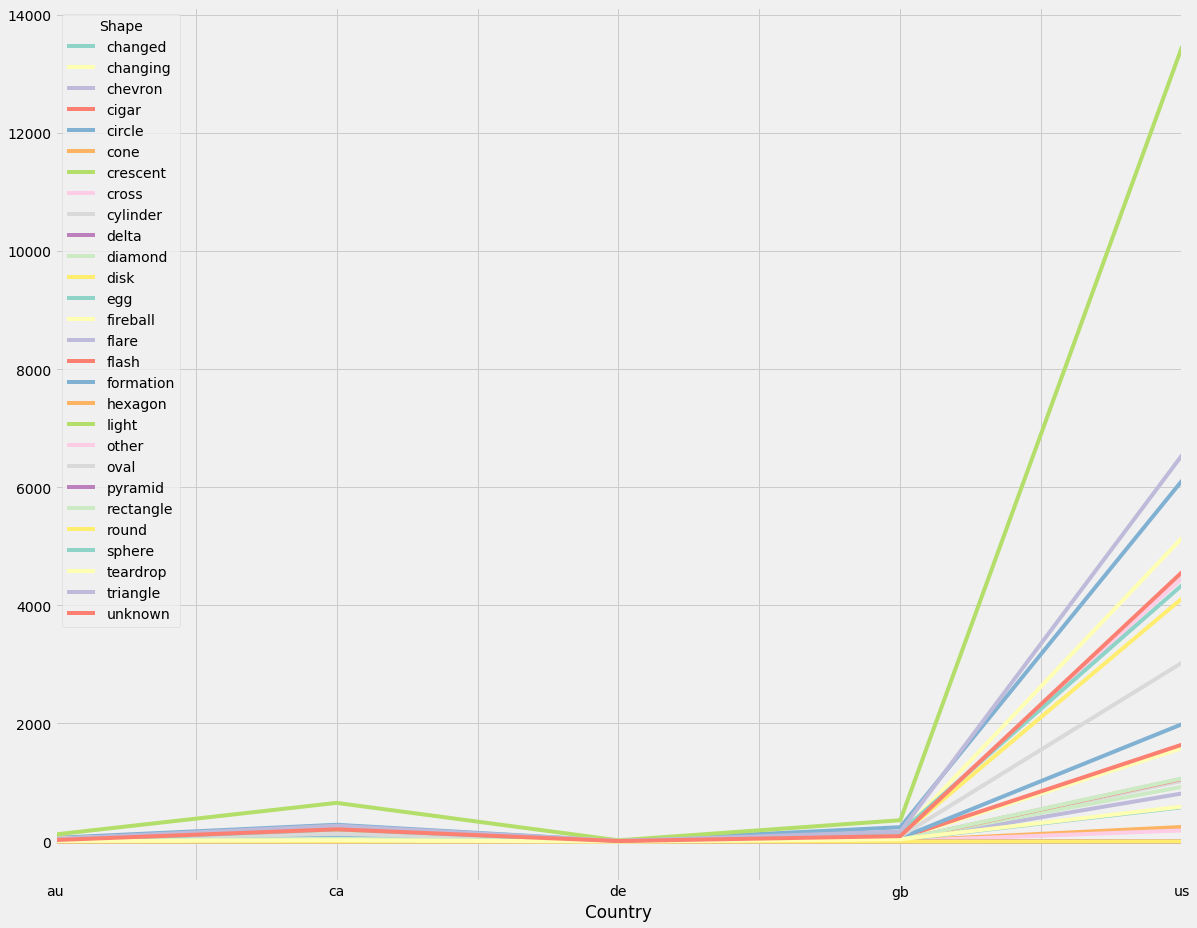

In [27]:
# This diagram shows the most common shape of UFO in different country
# We can see in most of countries the "light" is the largest number of UFO shape
# The Germany is the only county have the equal number of different UFO shape
# In others countries the most common shape of UFO both are "light"

rawdata_Shape=pd.crosstab(rawdata.Country,rawdata.Shape)
rawdata_Shape.plot(color=sns.color_palette('Set3',12))
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.show()

In [ ]:
# This diagram shows the UFO Sighting in global

m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(rawdata[rawdata['Encounter Seconds']>=1000].Latitude)
long_100=list(rawdata[rawdata['Encounter Seconds']>=1000].Longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(rawdata[rawdata['Encounter Seconds']<1000].Latitude)
long_=list(rawdata[rawdata['Encounter Seconds']<1000].Longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='aqua')
m3.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('Global UFO Sighting')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 1000 Encounter Seconds"),
                    mpatches.Patch(color='red',label='> 1000 Encounter Seconds')])
plt.show()

In [34]:
# I tried to made this animation to show the UFO appear in different times, but when I install the ffmpeg which is always fail.....

fig = plt.figure(figsize = (10,6))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Animation Of Shape'+'\n'+'Time:' +str(Time))
    m6 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    lat6=list(rawdata[rawdata['Time']==Year].Latitude)
    long6=list(rawdata[rawdata['Time']==Year].Longitude)
    x6,y6=m6(long6,lat6)
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(zorder = 1,alpha=0.4)
    m6.drawmapboundary()
ani = animation.FuncAnimation(fig,animate,list(rawdata.Time.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

# Common:
        #according few week python lecture, I think plot, panda and numpy module are good tool to analysis a great number of data to make them visible, after this study, we can use it on our other project to analyse different type of data.
        #the animation is also a nice tool to simulate the behavior of human, its very helpful to our preliminary analysis of architecture design

ValueError: Cannot save animation: no writers are available. Please install ffmpeg to save animations.